In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection

In [ ]:
garments_dataset = pd.read_csv('https://raw.githubusercontent.com/shivshaktisahoo/test/main/garments_worker_productivity.csv')
garments_dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
## preprocessing /////////////////
garments_dataset['wip'] = garments_dataset['wip'].fillna(0)
garments_dataset['quarter'] = garments_dataset['quarter'].map({'Quarter1':1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5})
for i in range(len(garments_dataset)):
  garments_dataset['department'][i] = garments_dataset['department'][i].strip()
garments_dataset['department'] = garments_dataset['department'].map({'sweing':1, 'finishing':0})
garments_dataset['day'] = garments_dataset['day'].map({'Saturday':1, 'Sunday':2, 'Monday':3, 'Tuesday':4, 'Wednesday':5,'Thursday':6})

garments_corr = garments_dataset.drop(['date'], axis=1).corr()
garments_corr



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
quarter,1.000000,-0.012441,0.002283,0.021038,-0.112319,-0.000105,-0.064439,0.026654,-0.028237,-0.060779,-0.023884,0.189905,-0.005594,-0.051970
department,-0.012441,1.000000,0.018241,0.031753,-0.067508,0.874230,0.388442,0.677519,0.045782,0.049181,0.096701,0.300889,0.939360,-0.087624
day,0.002283,0.018241,1.000000,-0.006399,-0.045685,0.010164,-0.022224,0.018933,-0.023396,-0.041165,0.001627,0.037138,0.022023,-0.036214
team,0.021038,0.031753,-0.006399,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,-0.112319,-0.067508,-0.045685,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.000105,0.874230,0.010164,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.064439,0.388442,-0.022224,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389
over_time,0.026654,0.677519,0.018933,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.028237,0.045782,-0.023396,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,-0.060779,0.049181,-0.041165,0.003796,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851


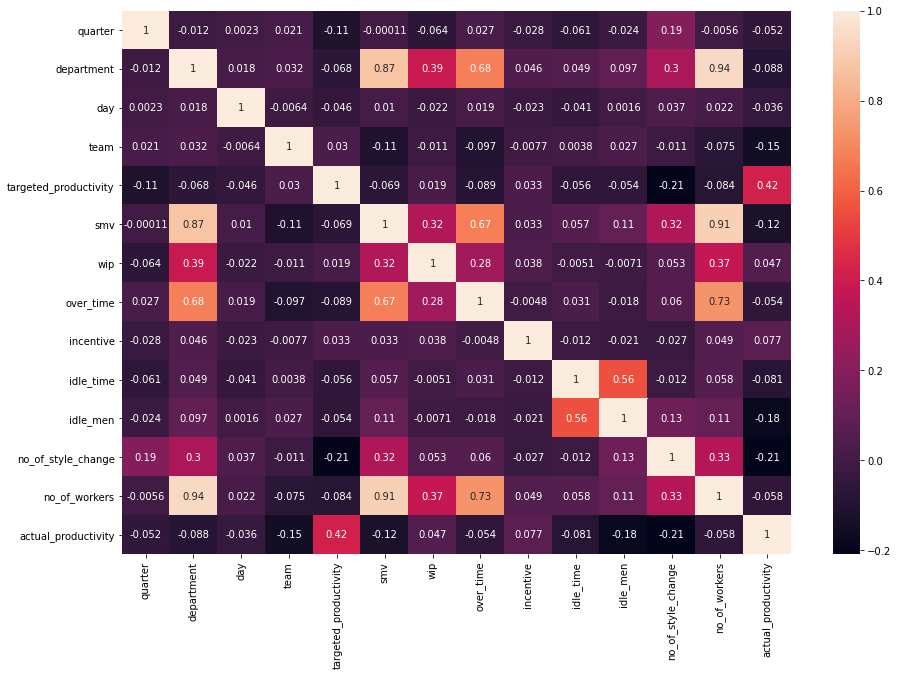

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(garments_corr,annot=True);

In [ ]:
# relationship between attribute and targeted column with minimum threshold
MIN_THRES = 0.05
garments_final_attr = []
for i in garments_corr.drop(['actual_productivity'],axis=1):
  if abs(garments_corr[i]['actual_productivity']) >= MIN_THRES:
      garments_final_attr.append(i)
print(garments_final_attr)

# relationship between attribute and attribute with maximum threshold
MAX_THRES = 0.85
list1 = list(garments_corr.columns)
max_final_attr = []
for i in enumerate(list1):
  for j in list1[i[0]+1:]:
    if abs(garments_corr[i[1]][j]) >= MAX_THRES:
      # print(abs(garments_corr[i[1]][j]),i[1],j)
      max_final_attr.append(i[1])
print(max_final_attr)

['quarter', 'department', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
['department', 'department', 'smv']


In [ ]:
garments_dataset_mod = garments_dataset.drop(columns = ["date",'day', 'department','wip', 'smv', 'actual_productivity'],axis=1)
garments_dataset_mod 

,quarter,team,targeted_productivity,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1,8,0.80,7080,98,0.0,0,0,59.0
1,1,1,0.75,960,0,0.0,0,0,8.0
2,1,11,0.80,3660,50,0.0,0,0,30.5
3,1,12,0.80,3660,50,0.0,0,0,30.5
4,1,6,0.80,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...
1192,2,10,0.75,960,0,0.0,0,0,8.0
1193,2,8,0.70,960,0,0.0,0,0,8.0
1194,2,7,0.65,960,0,0.0,0,0,8.0
1195,2,9,0.75,1800,0,0.0,0,0,15.0


In [ ]:
# Normalisation
colmns = ['quarter','team', 'targeted_productivity', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in colmns:
  scaler.fit(garments_dataset_mod[[i]])
  garments_dataset_mod[i] = scaler.transform(garments_dataset_mod[[i]])


In [ ]:
garments_dataset_mod

,quarter,team,targeted_productivity,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0.00,0.636364,1.000000,0.273148,0.027222,0.0,0.0,0.0,0.655172
1,0.00,0.000000,0.931507,0.037037,0.000000,0.0,0.0,0.0,0.068966
2,0.00,0.909091,1.000000,0.141204,0.013889,0.0,0.0,0.0,0.327586
3,0.00,1.000000,1.000000,0.141204,0.013889,0.0,0.0,0.0,0.327586
4,0.00,0.454545,1.000000,0.074074,0.013889,0.0,0.0,0.0,0.620690
...,...,...,...,...,...,...,...,...,...
1192,0.25,0.818182,0.931507,0.037037,0.000000,0.0,0.0,0.0,0.068966
1193,0.25,0.636364,0.863014,0.037037,0.000000,0.0,0.0,0.0,0.068966
1194,0.25,0.545455,0.794521,0.037037,0.000000,0.0,0.0,0.0,0.068966
1195,0.25,0.727273,0.931507,0.069444,0.000000,0.0,0.0,0.0,0.149425


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(garments_dataset_mod[colmns])
y_predicted

array([1, 2, 1, ..., 1, 1, 2], dtype=int32)

In [ ]:
garments_dataset_mod['label'] = y_predicted
c1,c2,c3 = km.cluster_centers_
c1,c2,c3

(array([6.95574163e-01, 5.00000000e-01, 8.81202071e-01, 1.85020896e-01,
        6.92517278e-03, 3.66826156e-04, 1.22275385e-02, 1.57894737e-01,
        3.98091624e-01]),
 array([0.16666667, 0.78645833, 0.93275542, 0.16323513, 0.01238209,
        0.00504774, 0.00908565, 0.01692708, 0.34422893]),
 array([0.16202532, 0.2013809 , 0.89897694, 0.17951096, 0.01279887,
        0.00208017, 0.00309423, 0.0443038 , 0.37995053]))

In [ ]:
# d1 = garments_dataset_mod.columns
d1 = {'quarter':0, 'team':1, 'targeted_productivity':2, 'over_time':3, 'incentive':4,
       'idle_time':5, 'idle_men':6, 'no_of_style_change':7, 'no_of_workers':8}
d1

5

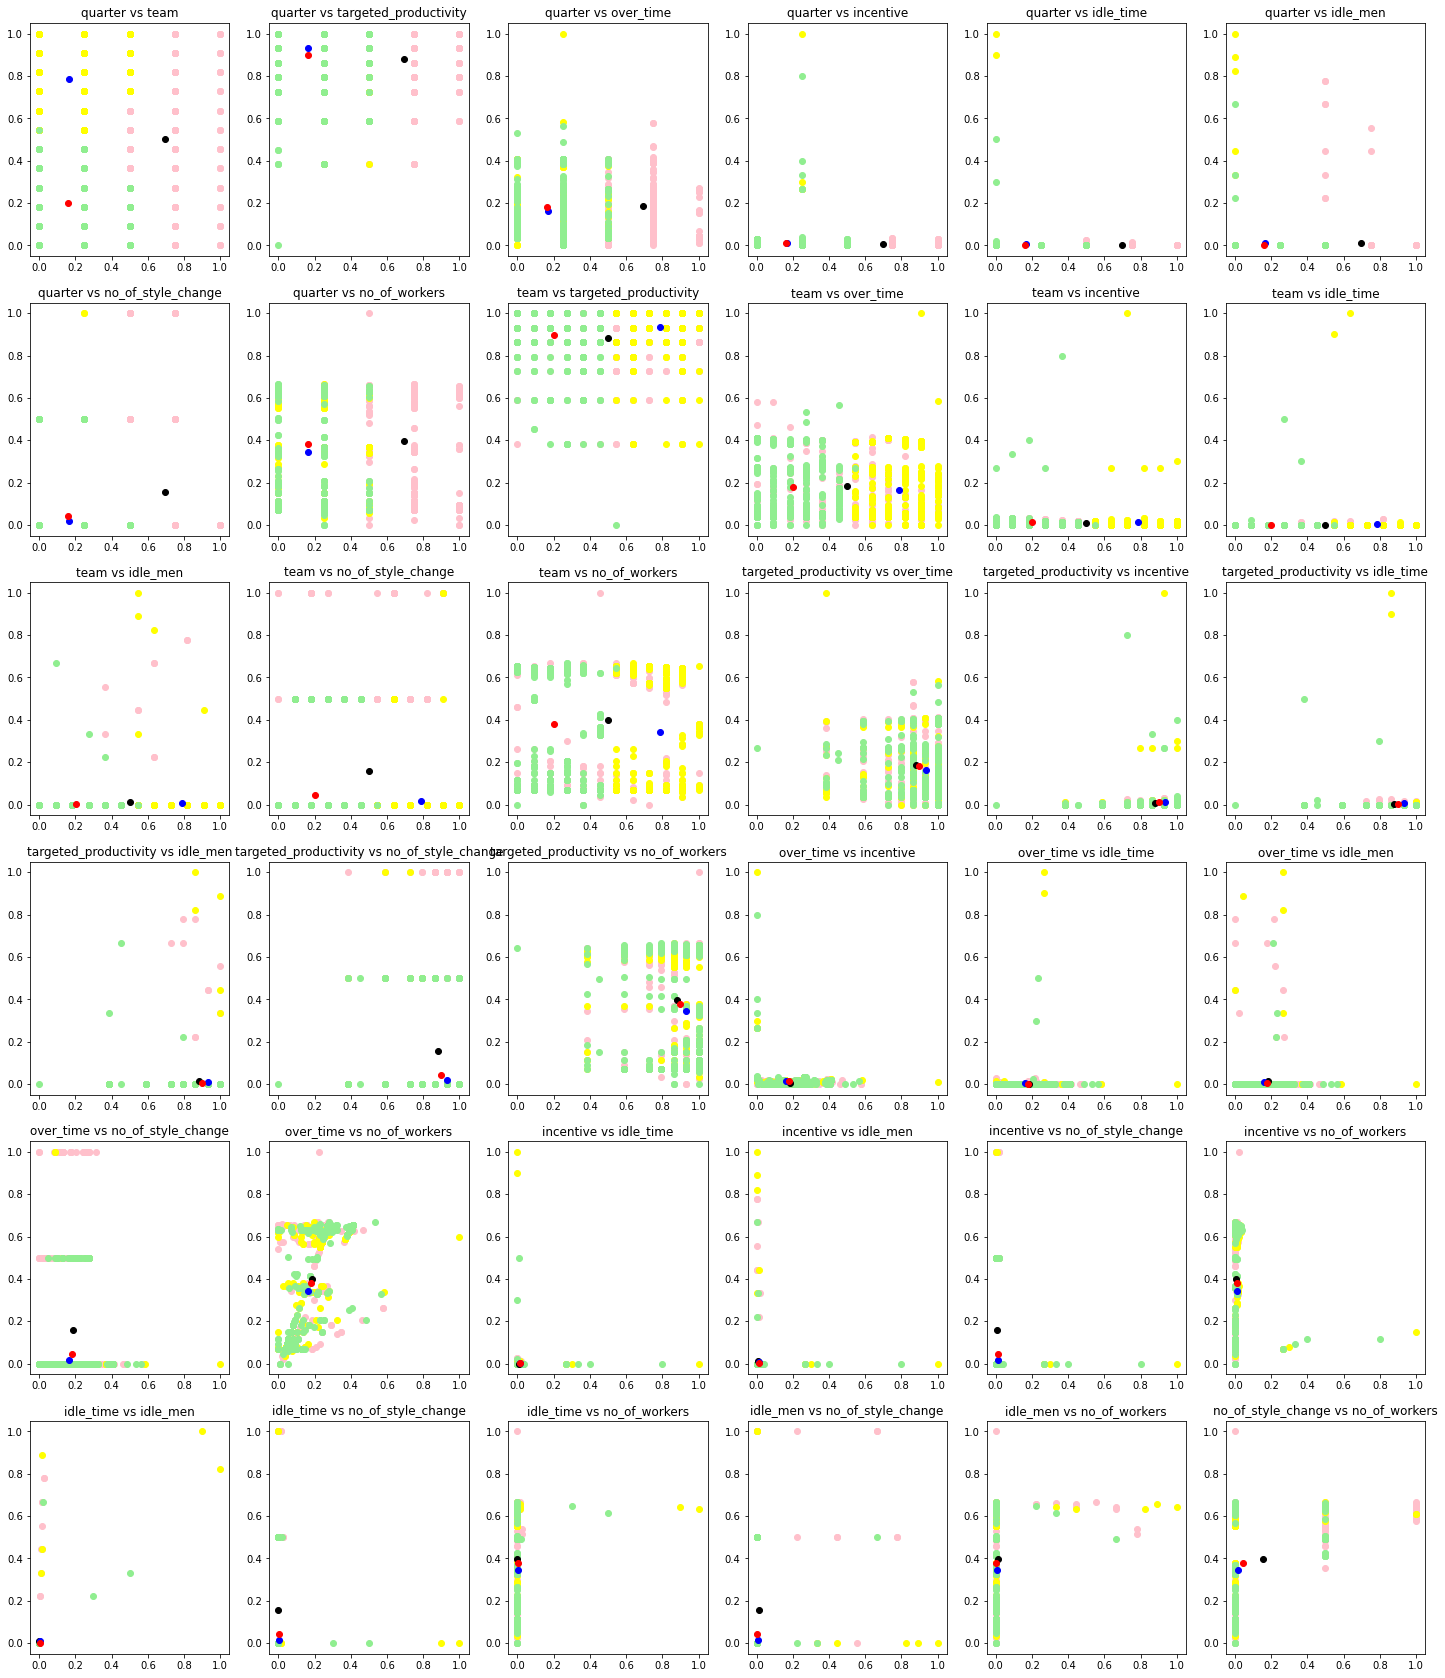

In [ ]:
plt.figure(figsize=(25,30))
from itertools import combinations
comb = combinations(colmns,2)
list1 = list(comb)
for i in range(1,37):
  plt.subplot(6,6,i)
  plt.title(f"{list1[i-1][0]} vs {list1[i-1][1]}")
  clr = ['pink','yellow','lightgreen']
  for j in range(3):
    plt.scatter(garments_dataset_mod[garments_dataset_mod['label']==j][list1[i-1][0]], garments_dataset_mod[garments_dataset_mod['label']==j][list1[i-1][1]],color=clr[j])
  plt.scatter(c1[d1[list1[i-1][0]]],c1[d1[list1[i-1][1]]], color='black')
  plt.scatter(c2[d1[list1[i-1][0]]],c2[d1[list1[i-1][1]]], color='blue')
  plt.scatter(c3[d1[list1[i-1][0]]],c3[d1[list1[i-1][1]]], color='red')
    

PCA applying

In [ ]:
garment = garments_dataset_mod.copy()
garment

,quarter,team,targeted_productivity,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,label
0,0.00,0.636364,1.000000,0.273148,0.027222,0.0,0.0,0.0,0.655172,1
1,0.00,0.000000,0.931507,0.037037,0.000000,0.0,0.0,0.0,0.068966,2
2,0.00,0.909091,1.000000,0.141204,0.013889,0.0,0.0,0.0,0.327586,1
3,0.00,1.000000,1.000000,0.141204,0.013889,0.0,0.0,0.0,0.327586,1
4,0.00,0.454545,1.000000,0.074074,0.013889,0.0,0.0,0.0,0.620690,2
...,...,...,...,...,...,...,...,...,...,...
1192,0.25,0.818182,0.931507,0.037037,0.000000,0.0,0.0,0.0,0.068966,1
1193,0.25,0.636364,0.863014,0.037037,0.000000,0.0,0.0,0.0,0.068966,1
1194,0.25,0.545455,0.794521,0.037037,0.000000,0.0,0.0,0.0,0.068966,1
1195,0.25,0.727273,0.931507,0.069444,0.000000,0.0,0.0,0.0,0.149425,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(garment.drop(['label'],axis=1))
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, garment[['label']]], axis = 1)
finalDf = finalDf.dropna()

In [ ]:
finalDf

,0,1,2,3,4,label
0,-0.032622,-0.273409,-0.383317,-0.132518,-0.071278,1
1,0.366328,-0.456168,0.344939,0.154354,-0.010601,2
2,-0.401715,-0.338159,-0.183373,0.002908,-0.064924,1
3,-0.487199,-0.332279,-0.213555,0.000169,-0.063487,1
4,0.102681,-0.309072,-0.239923,-0.056021,-0.092402,2
...,...,...,...,...,...,...
1192,-0.416014,-0.174287,0.158416,0.079666,-0.006163,1
1193,-0.242909,-0.180225,0.215924,0.095767,0.058001,1
1194,-0.155288,-0.180284,0.243251,0.109129,0.123601,1
1195,-0.302872,-0.159919,0.117267,0.047156,-0.008065,1


In [ ]:
print(pca.explained_variance_ratio_)

[0.29416668 0.28045173 0.22800092 0.10676855 0.04860173]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn
X = finalDf.drop(['label'], axis=1)
Y = finalDf['label']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.1)
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf.score(x_test,y_test)

1.0